# Reddit Insights on Nature, Screens, and Childhood Connection

This notebook explores how online reditt post reflects the emotional and conceptual framing of childhood, technology use, and nature connection. Drawing on thousands of Reddit posts from parenting, education, and nature-focused subreddits, the project uses Natural Language Processing (NLP) techniques to uncover the emotional tone and thematic patterns in how people talk about digital life, parenting struggles, and alternative values.

The analysis is part of a broader research project titled **“Learning to Be Human: Education for Presence, Purpose and Connection,”** which is proposes a tech-free, nature-based school designed to counterbalance the overstimulating, disembodied experience of digital childhood. Understanding how parents and educators frame these issues in everyday language can inform the school’s philosophy, communication strategy, and cultural relevance.

Using the Valence–Arousal–Dominance (VAD) model of emotion, this notebook scores the emotional landscape of posts discussing screen use and nature-based living. It also applies N-gram analysis to identify frequent keywords and repeated phrases, revealing dominant concerns and values within the discourse.

---

**Key Questions:**
- How are screens, parenting, and nature emotionally framed in online conversation?
- What emotional tone dominates when people talk about digital childhood vs. nature-based living?
- What repeated phrases or themes signal deeper cultural narratives around connection, learning, and disconnection?

By analysing both the content and tone of these discussions, the project seeks to bridge linguistic insights with design thinking, contributing to a reimagined vision of what it means to learn, grow, and be human in a post-digital world.


### Install Libarys 

In [1]:
!pip install spacy scikit-learn
!python -m spacy download en_core_web_sm
!pip install --upgrade pip
!pip install praw

import praw
import pandas as pd
import matplotlib.pyplot as plt
!pip install PRAW
import seaborn as sns
sns.set()
import numpy as np
!pip install praw
import praw
import datetime
import nltk
nltk.download('punkt')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
import spacy
from collections import Counter
import re
from sklearn.feature_extraction.text import CountVectorizer
import prawcore  # needed to catch exceptions

import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 

from nltk import stem
stemmer = stem.PorterStemmer()
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
stops = set(stopwords.words('english'))
import string
punct = list(string.punctuation)
from collections import Counter
import requests


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 69.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
  Using cached pip-25.1.1-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-25.1.1-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.3.1
    Uninstalling pip-24.3.1:
      Successfully uninstalled pip-24.3.1
  Using cached praw-7.8.1-py3-none-any.whl.metadata (9.4 kB)
  Using cached prawcore-2.4.0-py3-none-any.whl.metadata (5.0 kB)
  Using cached update_checker-0.18.0-py3-none-any.whl.metadata (2.3 kB)
Using cached praw-7.8.1-py3-none-any.whl (189 kB)
Using cached prawcore-2.4.0-py3-none-any.whl (17 kB)
Using cached update_checker-0.18.0-py

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/jovyan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Reddit connection using PRAW

In [5]:
reddit = praw.Reddit(
    user_agent='VAD',
    client_id='lqKS6ovYFNyIun5gsXBFfQ',
    client_secret='2kcdlLoWRzKnddosg-USxwXqalqDHA',
    username='PracticalElevator842',
    password='Sammyzo529!')

# Choosing Subreddits 
The subreddits chosen for this analysis were selected based on their relevance when searching for terms like “screen-free,” “nature-based education,” “forest school,” and “iPad kids.” These terms reflect core themes of the Capstone project, which explores how education can support presence, purpose, and connection in a world increasingly shaped by digital distraction and nature disconnection.

**The Chosen subreddits fall into 4 thematic categories:**

**1. Nature-based and outdoor education**

    r/Permaculture, r/homeschool
Focus on non-traditional learning through nature, outdoor play, and ecological awareness.

**2. Digital Resistance and Intentional living**

    r/nosurf, r/offthegrid
Communities resisting digital overload and promoting simpler, more mindful living.

**3. Parenting and teaching Perspectives**

    r/Mommit, r/Parenting, r/Teachers, 
Everyday experiences, emotional language, and challenges faced by parents and educators.

**4. Parenting and teaching Perspectives**

    r/Toddlers, r/Teenagers
Focused discussion and advice around the developmental, social, and emotional needs of young children and adolescents. 

In [3]:
import datetime
import time
import prawcore
import pandas as pd

subreddits = [
    'Permaculture',
    'homeschool',
    'NoSurf',
    'OffTheGrid',
    'Mommit',
    'Parenting',
    'Teachers',
    'toddlers',
    'teenagers',
    'ScienceBasedParenting',
    'ECEProfessionals'
]

posts = []
comments = []
max_posts = 1000
max_comments = 50

for sub in subreddits:
    print(f"\n>> {sub} <<")
    post_count = 0
    try:
        subreddit = reddit.subreddit(sub)
        subreddit.id  # test existence

        for post in subreddit.top(time_filter='all', limit=max_posts):
            post_count += 1
            print(f"  Post {post_count}: {post.title[:50]}...")
            posts.append({
                'subreddit': sub,
                'title': post.title,
                'text': post.selftext,
                'score': post.score,
                'url': post.url,
                'created_utc': post.created_utc
            })

            # Limit comments per post for speed
            try:
                post.comments.replace_more(limit=0)
                for i, c in enumerate(post.comments.list()):
                    if i >= max_comments:
                        break
                    comments.append({
                        'post_url': post.url,
                        'post_title': post.title,
                        'post_subreddit': sub,
                        'comment_text': c.body,
                        'comment_score': c.score,
                        'comment_author': str(c.author),
                        'comment_created_utc': datetime.datetime.fromtimestamp(c.created_utc)
                    })
                print(f"    - {i+1} comments saved")
            except Exception as ce:
                print(f"    - Comments error: {ce}")

        print(f"  {post_count} posts processed from r/{sub}")
        time.sleep(0.5)

    except prawcore.exceptions.Redirect:
        print(f"  Subreddit r/{sub} not found. Skipping...")
    except Exception as e:
        print(f"  Error with r/{sub}: {e}")

# Save to CSV
pd.DataFrame(posts).to_csv('reddit_capstone_data.csv1', index=False)
print(f"\nPosts saved: {len(posts)}")

pd.DataFrame(comments).to_csv('reddit_comments_data.csv1', index=False)
print(f"Comments saved: {len(comments)}")



>> Permaculture <<
  Post 1: Hope for you environmental doomers....
    - 51 comments saved
  Post 2: I’ve been testing how spent mushroom substrate aff...
    - 51 comments saved
  Post 3: Add now we wait....
    - 51 comments saved
  Post 4: Agrihood in Detroit...
    - 51 comments saved
  Post 5: Grow Food, not lawns...
    - 51 comments saved
  Post 6: I made a raised bed by weaving together sticks fro...
    - 51 comments saved
  Post 7: 
In Indonesia, farmers have implemented an ingenio...
    - 51 comments saved
  Post 8: Kill your grass (x-post /r/solarpunk)...
    - 51 comments saved
  Post 9: The truth well told....
    - 51 comments saved
  Post 10: Root Systems of Prairie Plants...
    - 51 comments saved
  Post 11: Society has progressed past the need for capitalis...
    - 51 comments saved
  Post 12: I thought you all would appreciate this accurate m...
    - 51 comments saved
  Post 13: Why care if species go extinct?...
    - 51 comments saved
  Post 14: Arroyo restor

In [2]:
import pandas as pd

# Read existing CSVs (fast)
posts_df = pd.read_csv('reddit_capstone_data.csv1')
comments_df = pd.read_csv('reddit_comments_data.csv1')

# Save as pickles for checkpointing
posts_df.to_pickle('reddit_posts.pkl')
comments_df.to_pickle('reddit_comments.pkl')


In [3]:
import os

# Save posts DataFrame as pickle, or load if already exists
if os.path.exists('reddit_posts.pkl'):
    posts_df = pd.read_pickle('reddit_posts.pkl')
    print("Loaded posts_df from file.")
else:
    posts_df = pd.DataFrame(posts)
    posts_df.to_pickle('reddit_posts.pkl')
    print("Saved posts_df to file.")

# Save comments DataFrame as pickle, or load if already exists
if os.path.exists('reddit_comments.pkl'):
    comments_df = pd.read_pickle('reddit_comments.pkl')
    print("Loaded comments_df from file.")
else:
    comments_df = pd.DataFrame(comments)
    comments_df.to_pickle('reddit_comments.pkl')
    print("Saved comments_df to file.")


Loaded posts_df from file.
Loaded comments_df from file.


In [2]:
df = pd.read_csv('reddit_capstone_data.csv1')
df.sample(5)

,subreddit,title,text,score,url,created_utc
6503,Teachers,Resigning today,My school has been planning to return to in pe...,3497,https://www.reddit.com/r/Teachers/comments/iis...,1.598706e+09
8363,teenagers,different reactions of the gender,NaN,54624,https://i.redd.it/r379i8pewr941.png,1.578584e+09
7917,toddlers,"""You're a good mom.""",My toddler said this to me this morning out of...,533,https://www.reddit.com/r/toddlers/comments/w40...,1.658359e+09
3066,OffTheGrid,Idaho modern oldtimer builds underground & sol...,NaN,36,https://youtu.be/8B6xR3T37gI,1.642466e+09
10286,ECEProfessionals,Is it bad form to take all my stuff with me wh...,"I have three years' worth of accumulated toys,...",323,https://www.reddit.com/r/ECEProfessionals/comm...,1.714415e+09


## Combine posts and comments

In [5]:
# Load checkpointed DataFrames
if os.path.exists('reddit_posts.pkl'):
    posts_df = pd.read_pickle('reddit_posts.pkl')
else:
    raise FileNotFoundError("reddit_posts.pkl not found.")

if os.path.exists('reddit_comments.pkl'):
    comments_df = pd.read_pickle('reddit_comments.pkl')
else:
    raise FileNotFoundError("reddit_comments.pkl not found.")

# Standardise column names
comments_df['subreddit'] = comments_df['post_subreddit']
comments_df['text'] = comments_df['comment_text']
comments_df['created_utc'] = pd.to_datetime(comments_df['comment_created_utc']).astype('int64') // 10**9

# Add missing columns for compatibility
for col in posts_df.columns:
    if col not in comments_df.columns:
        comments_df[col] = None
for col in comments_df.columns:
    if col not in posts_df.columns:
        posts_df[col] = None

# Ensure same column order
comments_df = comments_df[posts_df.columns]

# Combine into single DataFrame
if os.path.exists('combined_df.pkl'):
    df = pd.read_pickle('combined_df.pkl')
    print("Loaded combined DataFrame from file.")
else:
    df = pd.concat([posts_df, comments_df], ignore_index=True)
    df.to_pickle('combined_df.pkl')
    print("Saved combined DataFrame to file.")


Loaded combined DataFrame from file.


## Clean the data 

In [9]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)         # remove links
    text = re.sub(r'\n+', ' ', text)            # remove newlines
    text = re.sub(r'[^\x00-\x7F]+', '', text)   # remove emojis/non-ASCII
    return text.lower()

df['clean_text'] = df['text'].fillna('').apply(clean_text)
df['date'] = pd.to_datetime(df['created_utc'], unit='s')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.to_period('M').astype(str)


## Stem and Lemmatise 

In [10]:
nlp = spacy.load('en_core_web_sm')

def clean_text(text):
    if not isinstance(text, str):
        return ''
    # Remove URLs
    text = re.sub(r'http\S+|www\.\S+', '', text)
    # Remove common web fragments (optional)
    text = re.sub(r'\b(com|net|org|www|http|https)\b', '', text)
    return text.lower()

def lemmatise_words(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

# Save/load checkpoint for lemmatisation
if os.path.exists('df_lemmatised.pkl'):
    df = pd.read_pickle('df_lemmatised.pkl')
    print("Loaded lemmatised DataFrame from file.")
else:
    df['clean_text'] = df['text'].fillna('').apply(clean_text)
    df['lemmas'] = df['clean_text'].apply(lemmatise_words)
    df.to_pickle('df_lemmatised.pkl')
    print("Saved lemmatised DataFrame to file.")


Saved lemmatised DataFrame to file.


## Load the VAD Lexicon and apply to reddit posts

In [8]:
# Load the VAD lexicon
vad = pd.read_csv('./vad.csv', index_col=0)
vad = vad[['V.Mean.Sum', 'A.Mean.Sum', 'D.Mean.Sum']]
vad.columns = ['valence', 'arousal', 'dominance']
vad.index = vad.index.str.lower()

def get_vad_scores(text):
    if not isinstance(text, str):
        return pd.Series([None, None, None])
    words = text.split()
    matches = vad.loc[vad.index.intersection(words)]
    if len(matches) == 0:
        return pd.Series([None, None, None])
    return pd.Series(matches.mean().values)

# Checkpoint: run or load VAD scoring
if os.path.exists('df_vad.pkl'):
    df = pd.read_pickle('df_vad.pkl')
    print("Loaded DataFrame with VAD scores from file.")
else:
    # Join lemmas for scoring
    df[['valence', 'arousal', 'dominance']] = df['lemmas'].apply(
        lambda lemmas: get_vad_scores(' '.join(lemmas)))
    df.to_pickle('df_vad.pkl')
    print("Saved DataFrame with VAD scores to file.")

# Now filter and compute means
df_vad = df.dropna(subset=['valence', 'arousal', 'dominance'])

subreddit_means = df_vad.groupby('subreddit')[['valence', 'arousal', 'dominance']].mean().sort_values(by='valence', ascending=False)
print(subreddit_means)

# Check output
print(df[['subreddit', 'valence', 'arousal', 'dominance']].sample(5))


Loaded DataFrame with VAD scores from file.
                        valence   arousal  dominance
subreddit                                           
Mommit                 0.626927  0.407130   0.581853
Parenting              0.620397  0.403239   0.579587
homeschool             0.616149  0.384463   0.589497
Permaculture           0.613088  0.378431   0.588433
toddlers               0.609701  0.397340   0.574224
OffTheGrid             0.604692  0.374797   0.589832
NoSurf                 0.590772  0.388335   0.581628
teenagers              0.587873  0.409251   0.569130
ScienceBasedParenting  0.587417  0.378370   0.569843
ECEProfessionals       0.585808  0.381706   0.564349
Teachers               0.585104  0.393302   0.571699
               subreddit   valence   arousal  dominance
418717  ECEProfessionals  0.558365  0.416058   0.495288
165433         Parenting  0.636389  0.443889   0.584861
331446         teenagers  0.401250  0.263750   0.445000
344955         teenagers  0.622500  0.42640

# Average VAD Scores by Subreddit

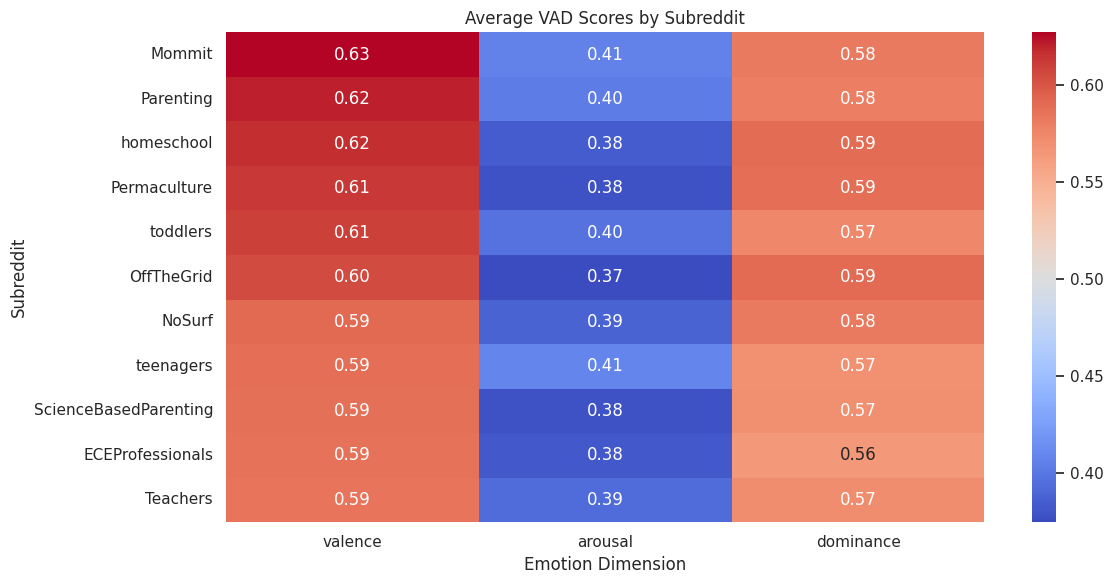

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(subreddit_means, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Average VAD Scores by Subreddit')
plt.xlabel('Emotion Dimension')
plt.ylabel('Subreddit')
plt.tight_layout()
plt.show()


## Group by month and subreddit

In [10]:
monthly_vad = df_vad.groupby(['month', 'subreddit'])[['valence', 'arousal', 'dominance']].mean().reset_index()
monthly_vad.head()

monthly_vad['month'] = pd.to_datetime(monthly_vad['month'])

# Plot each subredit to show the average Valence, Arousal and Dominance scores change month by month

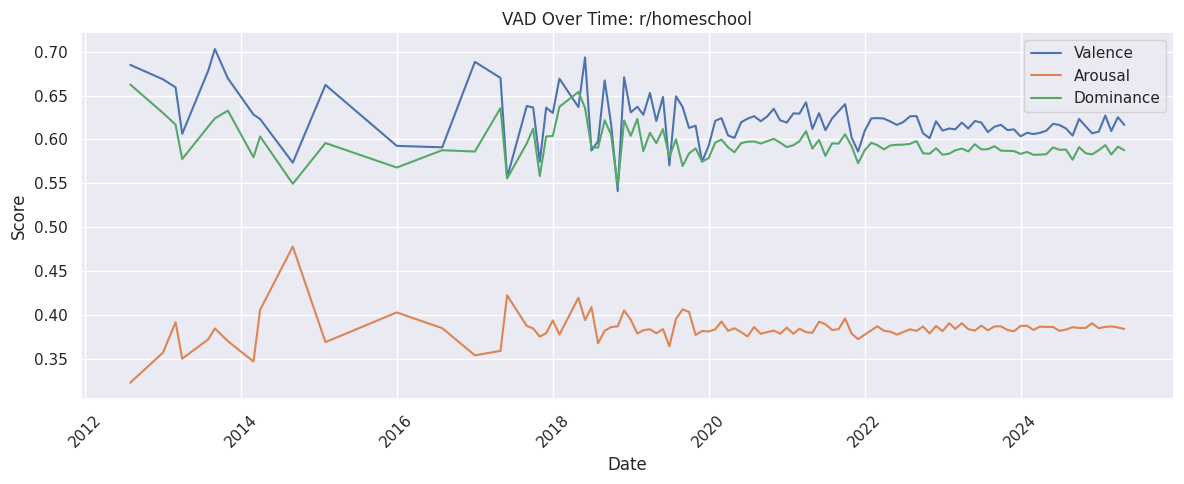

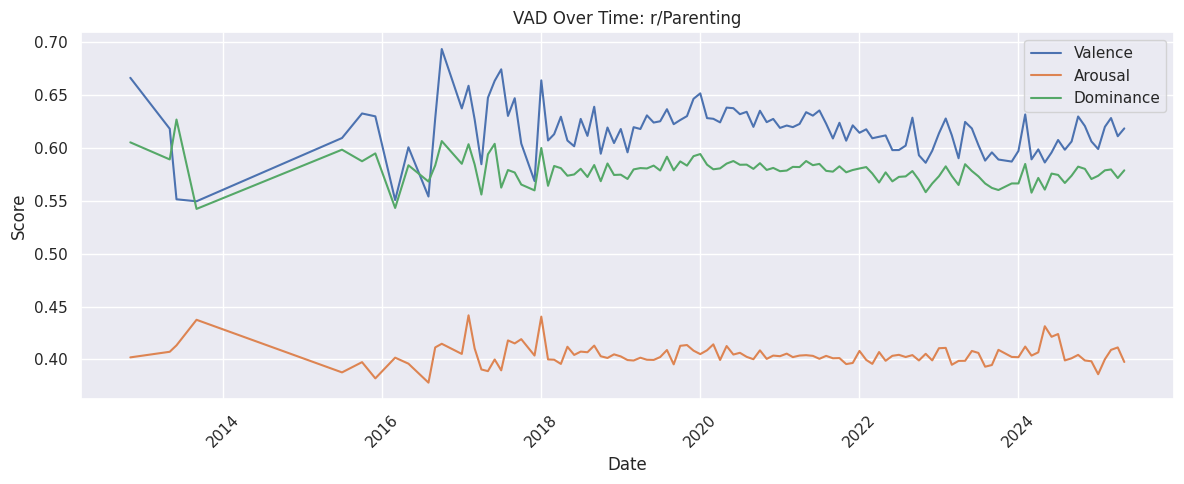

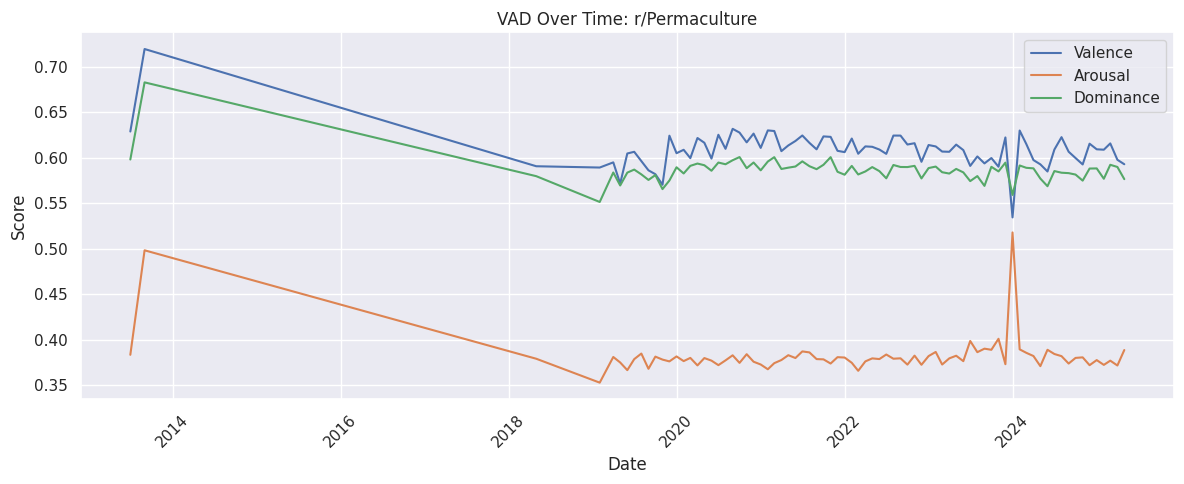

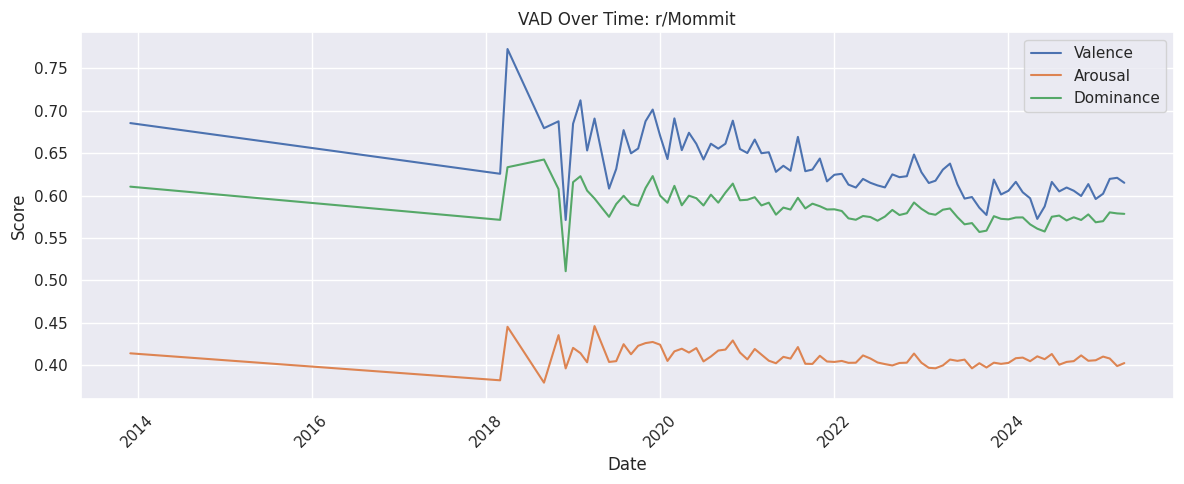

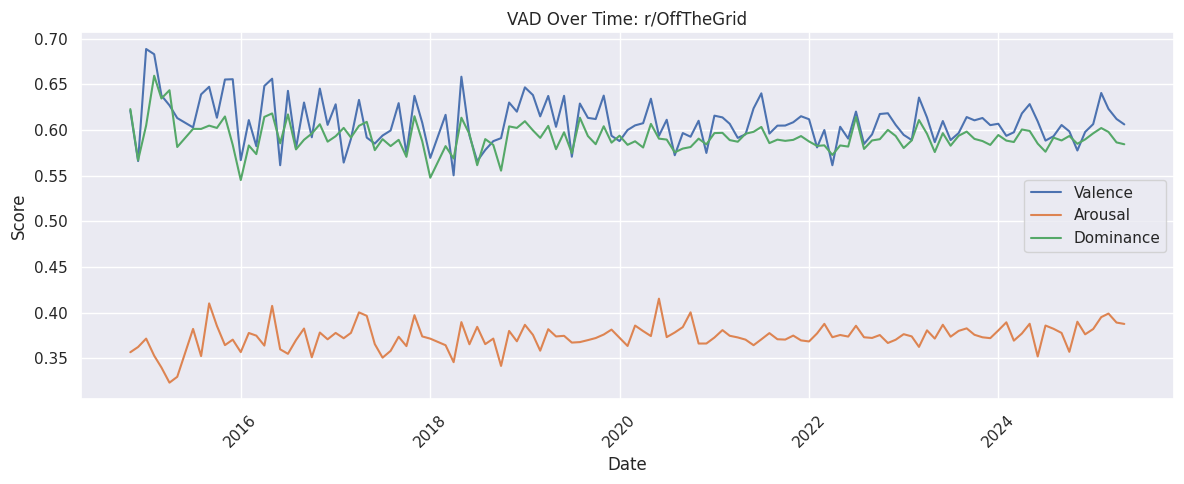

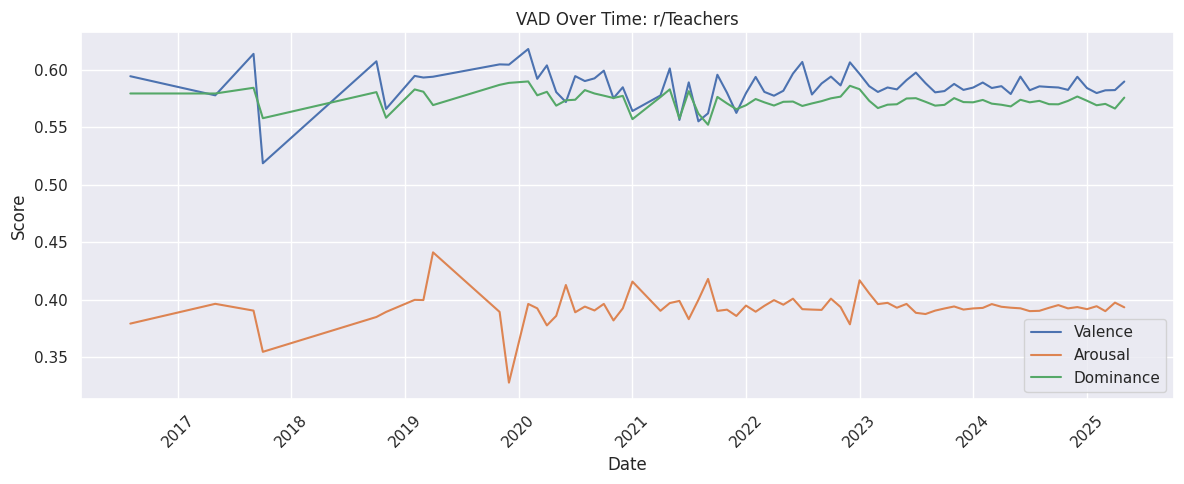

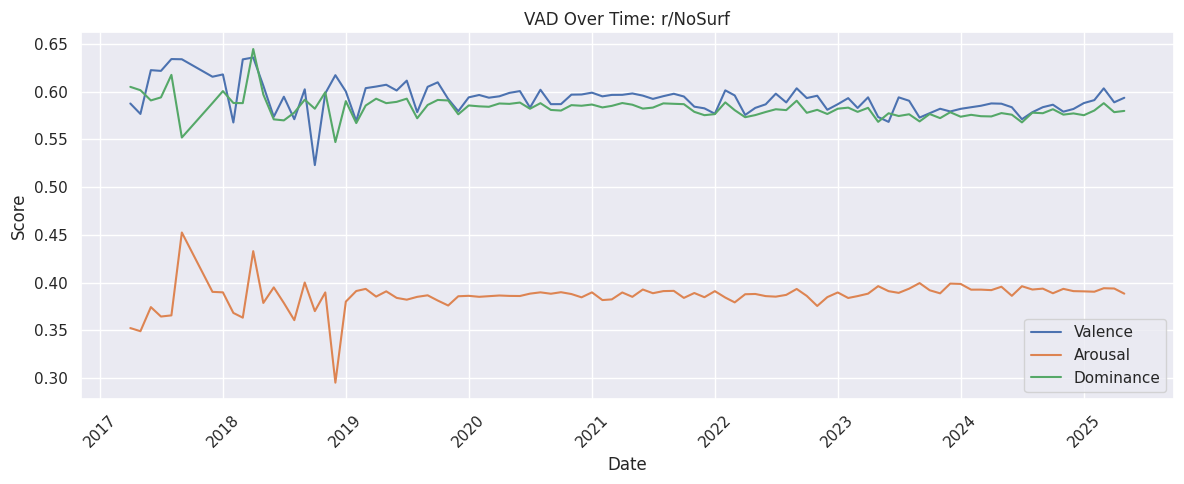

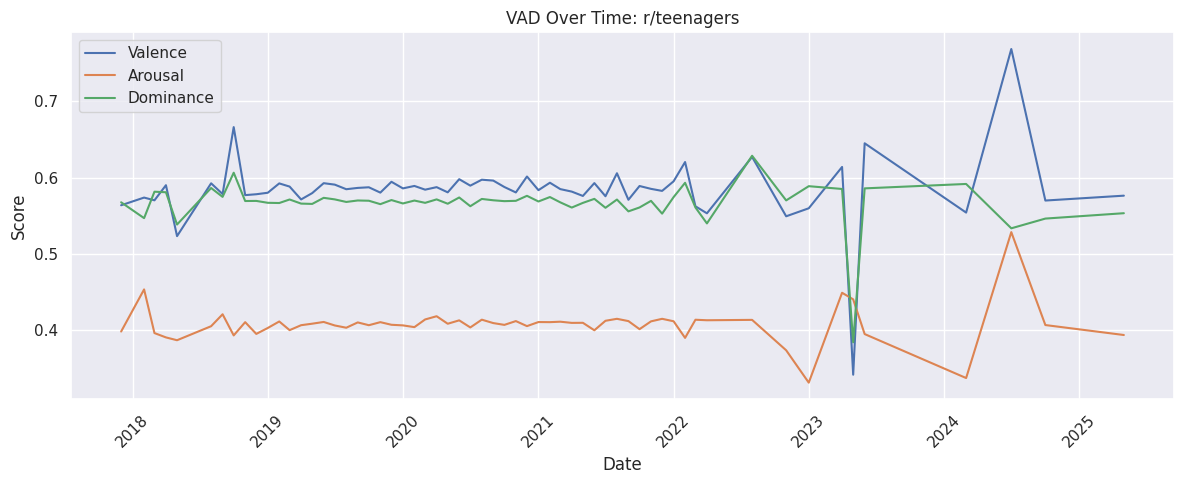

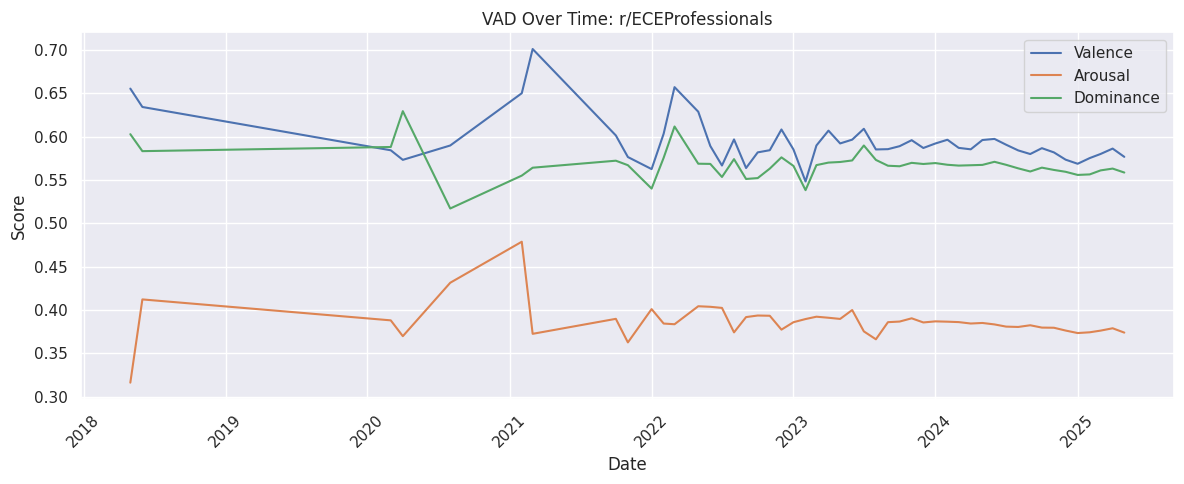

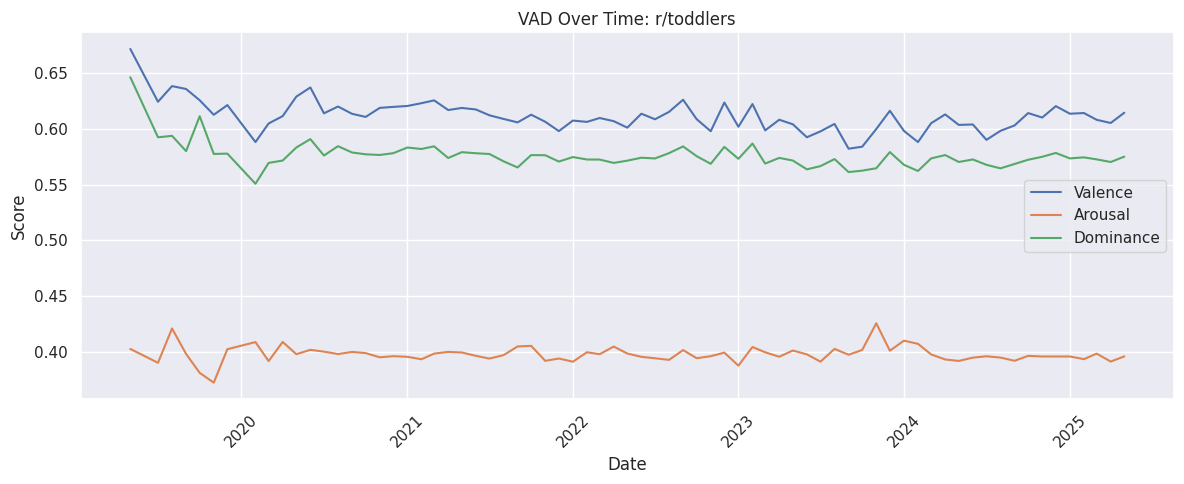

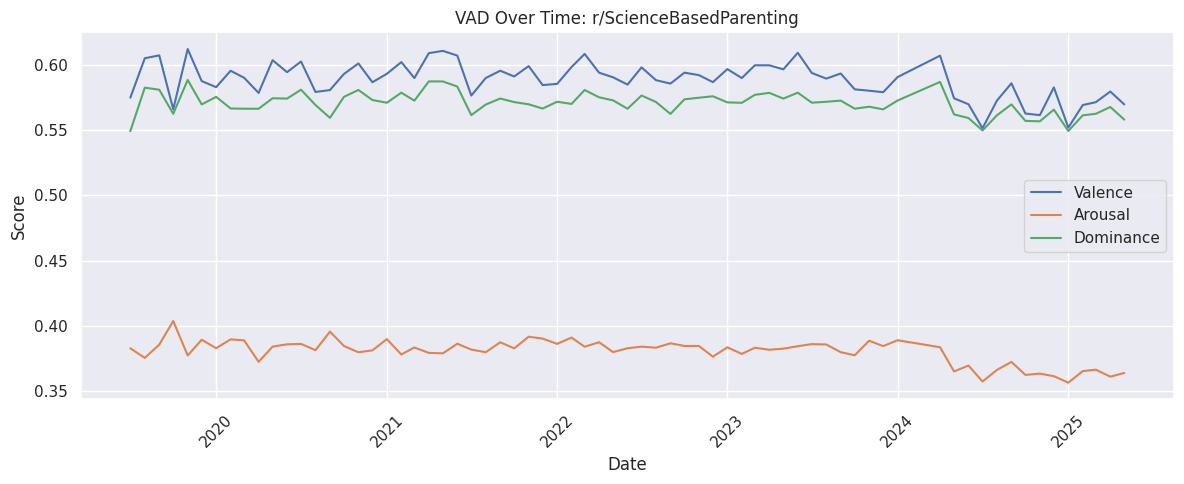

In [11]:
unique_subreddits = monthly_vad['subreddit'].unique()

for sub in unique_subreddits:
    subset = monthly_vad[monthly_vad['subreddit'] == sub]

    plt.figure(figsize=(12, 5))
    plt.plot(subset['month'], subset['valence'], label='Valence')
    plt.plot(subset['month'], subset['arousal'], label='Arousal')
    plt.plot(subset['month'], subset['dominance'], label='Dominance')
    plt.title(f'VAD Over Time: r/{sub}')
    plt.xlabel('Date') 
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Statistical Trends in VAD Scores

In [13]:
from scipy.stats import linregress

results = []

for sub in monthly_vad['subreddit'].unique():
    subset = monthly_vad[monthly_vad['subreddit'] == sub].copy()
    # Convert month to a numeric value for regression
    subset = subset.sort_values('month')
    subset['month_num'] = range(len(subset))
    for vad_var in ['valence', 'arousal', 'dominance']:
        slope, intercept, r_value, p_value, std_err = linregress(subset['month_num'], subset[vad_var])
        results.append({
            'subreddit': sub,
            'VAD': vad_var,
            'slope': slope,
            'p_value': p_value
        })

# Show results as a DataFrame
results_df = pd.DataFrame(results)
print(results_df)


                subreddit        VAD     slope       p_value
0              homeschool    valence -0.000285  5.291534e-04
1              homeschool    arousal  0.000032  5.216534e-01
2              homeschool  dominance -0.000202  2.932301e-04
3               Parenting    valence -0.000143  4.224034e-02
4               Parenting    arousal -0.000015  6.057257e-01
5               Parenting  dominance -0.000122  5.194726e-04
6            Permaculture    valence -0.000141  1.711315e-01
7            Permaculture    arousal  0.000048  6.635031e-01
8            Permaculture  dominance -0.000118  9.840831e-02
9                  Mommit    valence -0.001066  2.719510e-14
10                 Mommit    arousal -0.000176  4.017215e-04
11                 Mommit  dominance -0.000465  4.778811e-09
12             OffTheGrid    valence -0.000138  2.492182e-02
13             OffTheGrid    arousal  0.000121  4.278888e-04
14             OffTheGrid  dominance -0.000085  2.967551e-02
15               Teacher

## Subreddit-Level Trend Analysis
### homeschool:
Valence and dominance show small but statistically significant declines (p < 0.001), while arousal is flat. This suggests a gradual decrease in positivity and control language, though the effect size is minimal.
### Parenting:
Valence and dominance both decline slightly over time (p < 0.05). Arousal remains stable. Discussion tone is becoming a bit less positive and less strong, but changes are extremely slow.
### Permaculture:
No significant trend in any VAD dimension. The emotional tone in this group is stable.
### Mommit:
Significant decreases in valence, arousal, and dominance (all p < 0.001). This is the sharpest downward trend in the dataset, indicating the community is becoming less positive, less energetic, and less in-control in its language. The size of the change is still small month-to-month.
### OffTheGrid:
All VAD scores show statistically significant but very small changes. Valence and dominance decrease; arousal slightly increases. The group is marginally less positive and controlled, but slightly more activated.
### Teachers:
Only dominance declines significantly (p < 0.05). Valence and arousal show no trend, so the overall tone is steady.
### NoSurf:
All VAD dimensions show significant trends: valence and dominance drop, arousal increases. This suggests more energetic, but less positive and controlled language over time. Again, monthly changes are tiny.
### teenagers:
No significant trends in any VAD dimension. The tone here is flat over time.
### ECEProfessionals:
Valence declines (p < 0.01), arousal and dominance are stable. There is a minor trend towards less positive discussion.
### toddlers:
Significant declines in valence and dominance, no change in arousal. Less positivity and control in language, but shifts are very small.
### ScienceBasedParenting:
All three VAD scores decline significantly over time (p < 0.01), indicating a subtle shift towards less positive, less energetic, and less controlled language.

In [13]:
df_vad['subreddit'].value_counts() # See how many valud posts for each subredit

subreddit
Parenting                49796
Teachers                 48509
toddlers                 47643
Mommit                   44632
ECEProfessionals         44367
teenagers                42768
ScienceBasedParenting    40111
Permaculture             35575
NoSurf                   35239
homeschool               30983
OffTheGrid                5448
Name: count, dtype: int64

# Top 20 trigrams accross all posts

In [ ]:
import os
from tqdm import tqdm
tqdm.pandas()
from sklearn.feature_extraction.text import CountVectorizer
import joblib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Rejoin lemmas into string format with checkpoint
if os.path.exists('df_lemmatised_text.pkl'):
    df = pd.read_pickle('df_lemmatised_text.pkl')
    print("Loaded DataFrame with 'lemmatised_text' from file.")
else:
    df['lemmatised_text'] = df['lemmas'].progress_apply(lambda x: ' '.join(x))
    df.to_pickle('df_lemmatised_text.pkl')
    print("Saved DataFrame with 'lemmatised_text' to file.")

# 2. Trigram analysis with checkpoint, limit features to save RAM
if os.path.exists('trigram_X.joblib') and os.path.exists('trigram_vectorizer.joblib'):
    X = joblib.load('trigram_X.joblib')
    vectorizer = joblib.load('trigram_vectorizer.joblib')
    print("Loaded trigram matrix and vectorizer from file.")
else:
    vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english', max_features=20000)
    X = vectorizer.fit_transform(df['lemmatised_text'])
    joblib.dump(X, 'trigram_X.joblib')
    joblib.dump(vectorizer, 'trigram_vectorizer.joblib')
    print("Saved trigram matrix and vectorizer to file.")

# 3. Get top trigrams and plot (avoid dense array!)
trigram_freq = np.array(X.sum(axis=0)).flatten()
trigram_names = vectorizer.get_feature_names_out()
trigram_freq_series = pd.Series(trigram_freq, index=trigram_names).sort_values(ascending=False)
top_trigrams = trigram_freq_series.head(20)

plt.figure(figsize=(10, 6))
top_trigrams.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 20 Trigrams in Reddit Posts and Comments")
plt.xlabel("Frequency")
plt.tight_layout()
plt.show()


# Top 10 trigrams accross each reddit posts

In [14]:
# Rejoin lemmas into string format (if not already done)
if 'lemmatised_text' not in df.columns:
    df['lemmatised_text'] = df['lemmas'].apply(lambda x: ' '.join(x))

# Group by subreddit and get top trigrams for each
subreddit_top_ngrams = {}
for subreddit, group in df.groupby('subreddit'):
    top_ngrams = get_top_ngrams(group['lemmatised_text'], n=3, top_k=10)
    subreddit_top_ngrams[subreddit] = top_ngrams

# Plot for each subreddit
for subreddit, top_ngrams in subreddit_top_ngrams.items():
    plt.figure(figsize=(10, 6))
    top_ngrams.plot(kind='barh')
    plt.gca().invert_yaxis()
    plt.title(f"Top 10 Trigrams in r/{subreddit}")
    plt.xlabel("Frequency")
    plt.tight_layout()
    plt.show()


NameError: name 'get_top_ngrams' is not defined

# Most frequent words in each subredit

In [15]:
import os
from collections import Counter

if os.path.exists('subreddit_word_scores.joblib'):
    import joblib
    subreddit_word_scores = joblib.load('subreddit_word_scores.joblib')
    print("Loaded subreddit_word_scores from file.")
else:
    df['score_value'] = df['score'].fillna(0) + df['comment_score'].fillna(0)

    subreddit_word_scores = {}
    for subreddit in df['subreddit'].unique():
        word_score_counter = Counter()
        sub_df = df[df['subreddit'] == subreddit]
        for _, row in sub_df.iterrows():
            words = row['lemmas'] if isinstance(row['lemmas'], list) else []
            score = row['score_value']
            for word in words:
                word_score_counter[word] += score
        subreddit_word_scores[subreddit] = word_score_counter.most_common(20)  # Top 20 by score

    import joblib
    joblib.dump(subreddit_word_scores, 'subreddit_word_scores.joblib')
    print("Saved subreddit_word_scores to file.")

# Print results
for subreddit, words in subreddit_word_scores.items():
    print(f"\n🔹 Top score-weighted words in r/{subreddit}:")
    for word, score in words:
        print(f"{word}: {int(score)}")


/tmp/ipykernel_78/2481171582.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['score_value'] = df['score'].fillna(0) + df['comment_score'].fillna(0)


Saved subreddit_word_scores to file.

🔹 Top score-weighted words in r/Permaculture:
plant: 129066
like: 112475
soil: 112236
year: 86663
grow: 83871
tree: 82017
people: 73534
work: 72533
permaculture: 70712
want: 66987
good: 60000
think: 58383
look: 57482
time: 56437
garden: 55490
lot: 54347
thing: 50511
need: 48444
go: 46964
water: 46341

🔹 Top score-weighted words in r/homeschool:
school: 303750
kid: 273255
child: 141456
time: 127806
like: 127624
year: 123600
work: 113792
homeschool: 111581
know: 94831
public: 94587
parent: 94514
want: 94332
homeschooling: 92099
learn: 87895
need: 85206
think: 84245
day: 84217
thing: 80432
go: 79222
grade: 77719

🔹 Top score-weighted words in r/NoSurf:
time: 705482
like: 696907
people: 649162
life: 592697
feel: 477912
social: 444115
internet: 437193
day: 425983
phone: 410538
thing: 400229
medium: 394753
think: 377338
reddit: 311322
know: 298066
want: 297743
go: 293870
year: 253779
hour: 250792
post: 247151
get: 237883

🔹 Top score-weighted words in r/

# Cluster based on VAD

In [30]:
results = {}
for subreddit, word_scores in subreddit_word_scores.items():
    words = [w for w, _ in word_scores if w in vad.index]
    if len(words) < 4:  # Too few for clustering
        continue
    X = np.array([vad.loc[w].values for w in words])
    n_clusters = min(3, len(words))
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(X)
    clusters = []
    for i in range(n_clusters):
        clusters.append([words[j] for j in range(len(words)) if labels[j] == i])
    results[subreddit] = clusters

for subreddit, clusters in results.items():
    print(f"\n{subreddit}:")
    for i, cluster in enumerate(clusters, 1):
        print(f"  Cluster {i}: {cluster}")



Permaculture:
  Cluster 1: ['plant', 'like', 'tree', 'good', 'think', 'garden', 'water']
  Cluster 2: ['work', 'want', 'look', 'go']
  Cluster 3: ['soil', 'year', 'grow', 'people', 'time', 'thing', 'need']

homeschool:
  Cluster 1: ['kid', 'child', 'parent', 'want', 'go']
  Cluster 2: ['like', 'know', 'learn', 'think', 'day']
  Cluster 3: ['school', 'time', 'year', 'work', 'public', 'need', 'thing', 'grade']

NoSurf:
  Cluster 1: ['time', 'people', 'phone', 'thing', 'medium', 'year', 'hour', 'post']
  Cluster 2: ['like', 'life', 'social', 'internet', 'want', 'go']
  Cluster 3: ['feel', 'day', 'think', 'know', 'get']

OffTheGrid:
  Cluster 1: ['grid', 'need', 'work', 'look', 'year', 'people', 'solar', 'time', 'thing']
  Cluster 2: ['live', 'like', 'good', 'house']
  Cluster 3: ['water', 'want', 'land', 'build', 'know', 'think', 'go']

Mommit:
  Cluster 1: ['time', 'say', 'tell', 'get', 'know', 'day', 'feel', 'need', 'year', 'think', 'come']
  Cluster 2: ['like', 'kid', 'baby', 'go', 'w

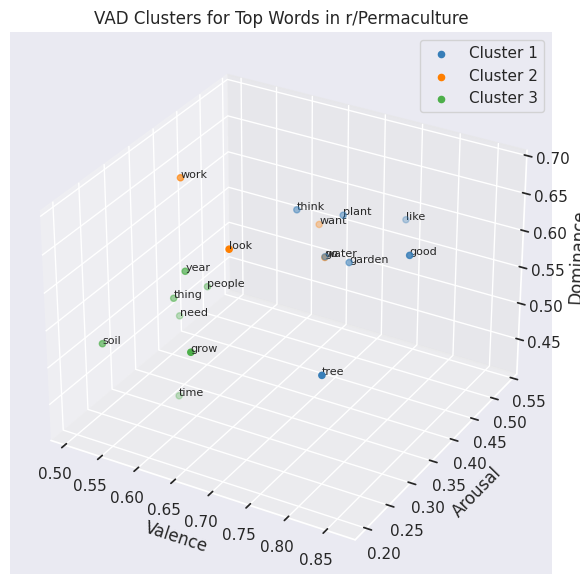

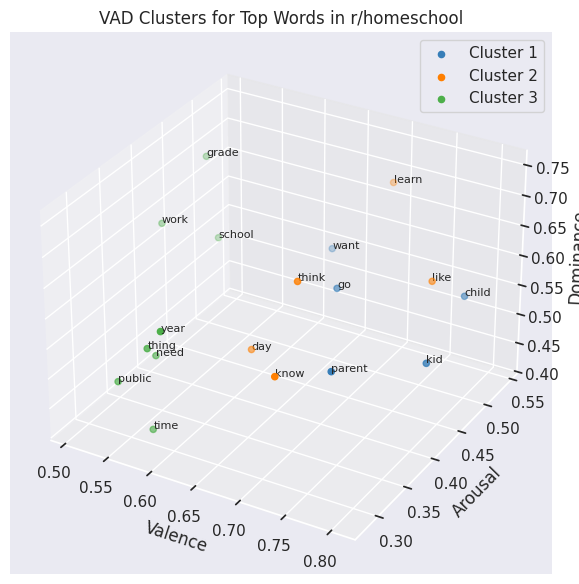

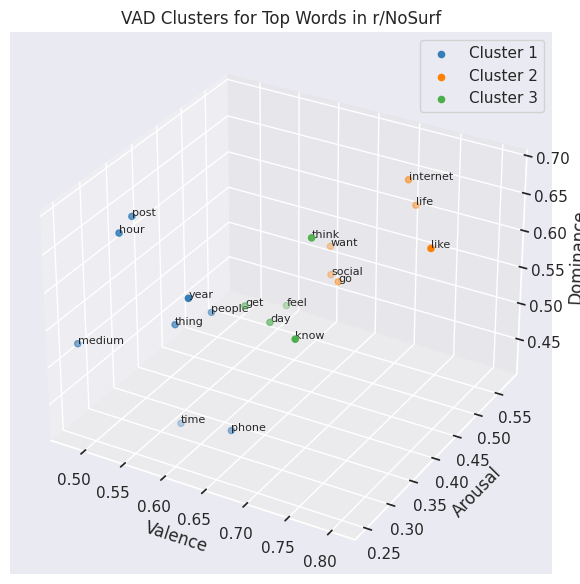

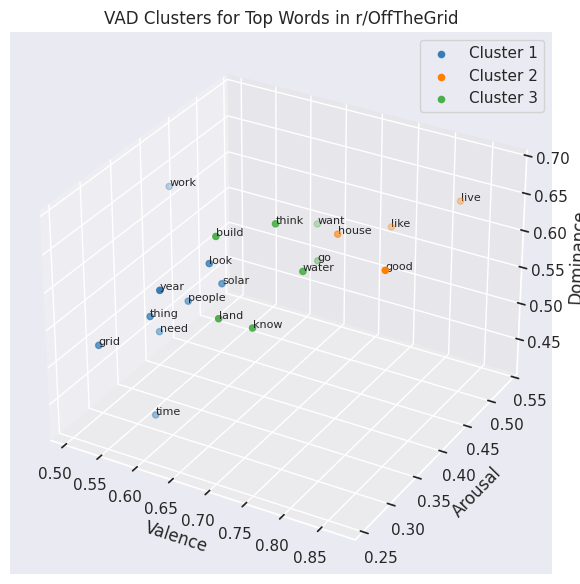

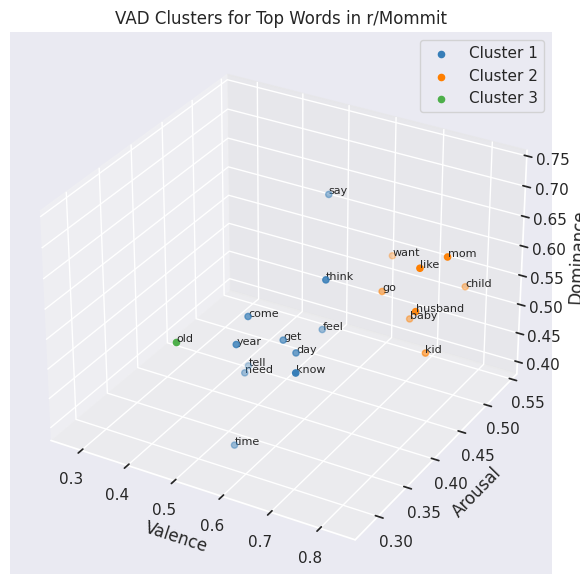

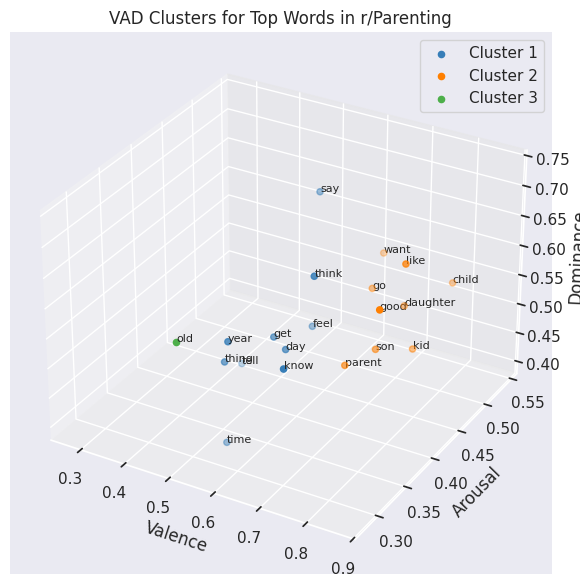

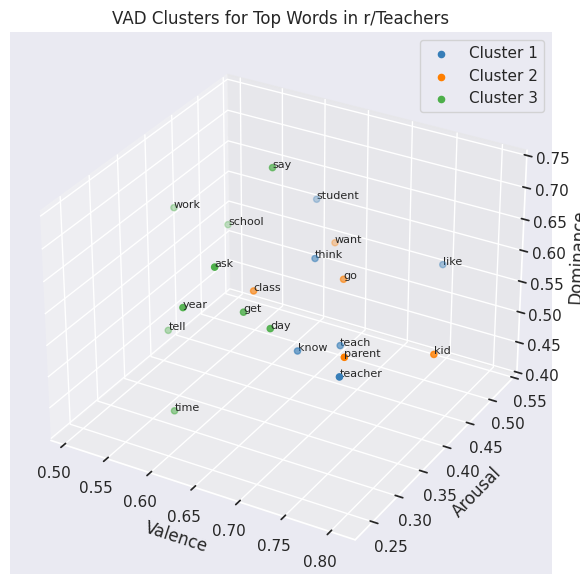

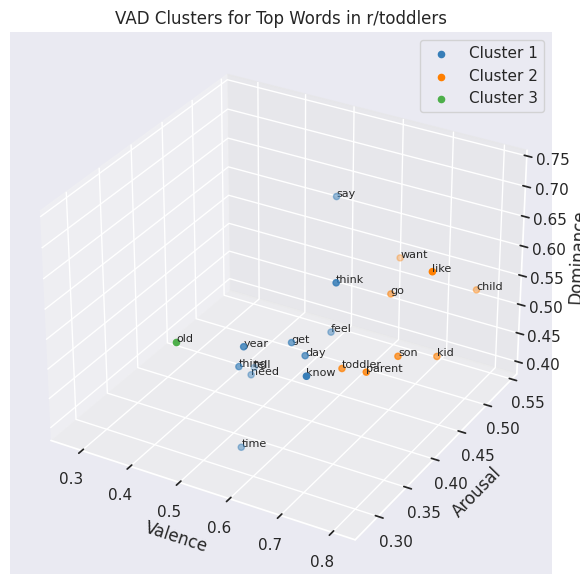

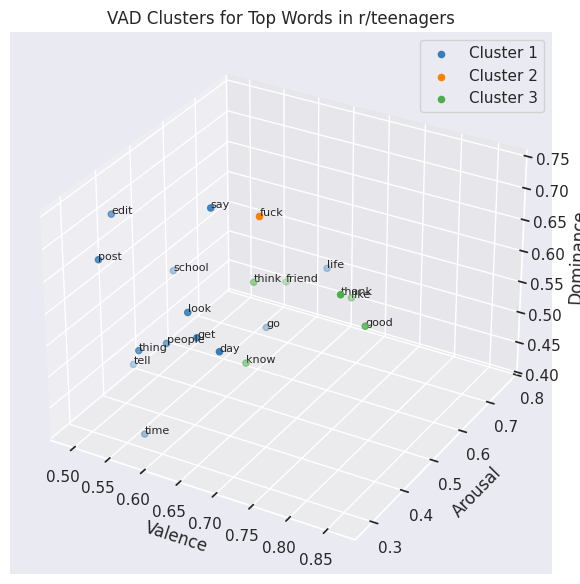

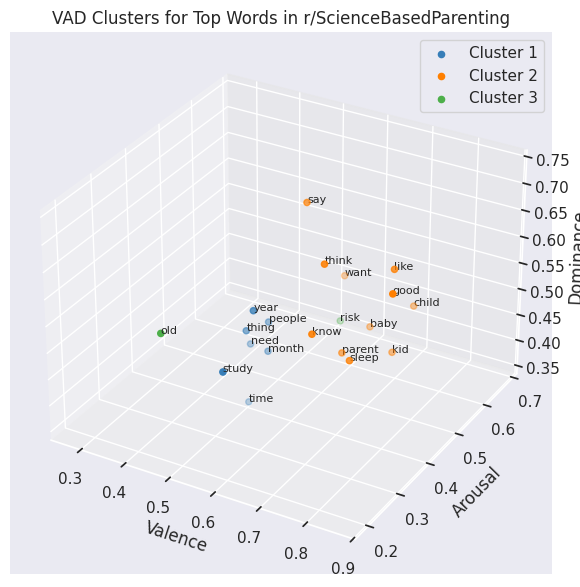

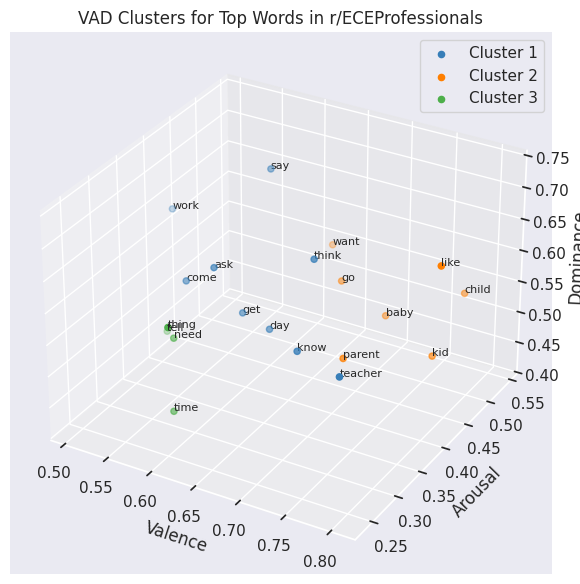

In [29]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

for subreddit, word_scores in subreddit_word_scores.items():
    # Get words present in VAD lexicon
    words = [w for w, _ in word_scores if w in vad.index]
    if len(words) < 4:
        continue  # Skip if not enough words
    X = np.array([vad.loc[w].values for w in words])
    n_clusters = min(3, len(words))
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(X)
    
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    colors = ['#377eb8', '#ff7f00', '#4daf4a']  # Color per cluster
    for i in range(n_clusters):
        idx = labels == i
        ax.scatter(X[idx, 0], X[idx, 1], X[idx, 2], color=colors[i], label=f"Cluster {i+1}")
        for j in np.where(idx)[0]:
            ax.text(X[j, 0], X[j, 1], X[j, 2], words[j], fontsize=8)
    ax.set_xlabel('Valence')
    ax.set_ylabel('Arousal')
    ax.set_zlabel('Dominance')
    ax.set_title(f"VAD Clusters for Top Words in r/{subreddit}")
    ax.legend()
    plt.tight_layout()
    plt.show()
